# 2. Load and Explore the Dataset

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import reuters
from nltk.stem import WordNetLemmatizer

In [2]:
# Read the dataset file

df = pd.read_csv('Tweets.csv')

In [3]:
# Explore the dataset.
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# 3. Data Preprocessing

In [6]:
# Removing unnecessary colums.

df = df.drop(['negativereason','negativereason_confidence','airline_sentiment_gold','negativereason_gold'], axis=1)

In [7]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [8]:
# Handling missing values. 

print('Missing Values:')
print(df.isnull().sum())


Missing Values:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [11]:
# Keep only the necessary columns
df = df[['text', 'airline_sentiment']]

In [12]:
# Clean the text data
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x))  # Remove Twitter handles
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'\W', ' ', x))  # Remove non-word characters
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x))  # Remove extra whitespaces


C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_7348\3896864831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x))  # Remove Twitter handles
C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_7348\3896864831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_7348\3896864831.py:4: Setti

In [13]:

# Download stopwords and punkt tokenizer if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')#Punctuation Full Form.


[nltk_data] Downloading package stopwords to C:\Users\STDC Tourism
[nltk_data]     Counter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\STDC Tourism
[nltk_data]     Counter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Tokenization, converting to lowercase, and removing stopwords
stop_words = set(stopwords.words('english'))

In [15]:
df['text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenization and lowercase conversion
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])  # Remove stopwords

C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_7348\867304285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenization and lowercase conversion
C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_7348\867304285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])  # Remove stopwords


In [16]:
df

,text,airline_sentiment
0,[said],neutral
1,"[plus, added, commercials, experience, tacky]",positive
2,"[today, must, mean, need, take, another, trip]",neutral
3,"[really, aggressive, blast, obnoxious, enterta...",negative
4,"[really, big, bad, thing]",negative
...,...,...
14635,"[thank, got, different, flight, chicago]",positive
14636,"[leaving, 20, minutes, late, flight, warnings,...",negative
14637,"[please, bring, american, airlines, blackberry10]",neutral
14638,"[money, change, flight, answer, phones, sugges...",negative


In [17]:
# Convert the tokenized text back to string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_7348\3020800947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join(x))


In [18]:
df

,text,airline_sentiment
0,said,neutral
1,plus added commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
...,...,...
14635,thank got different flight chicago,positive
14636,leaving 20 minutes late flight warnings commun...,negative
14637,please bring american airlines blackberry10,neutral
14638,money change flight answer phones suggestions ...,negative


# 4. Split the dataset

In [19]:
# X = df.drop(['airline_sentiment'], axis=1)
# y = df['airline_sentiment']

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.20, random_state=42)

In [22]:
# Explore sentiment distribution
sentiment_counts = df['airline_sentiment'].value_counts()
print(sentiment_counts)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


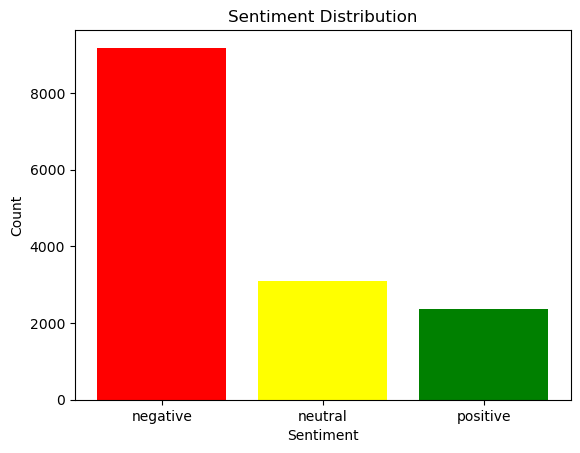

In [23]:
# Visualize sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'yellow', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# 5. Feature Extraction

In [24]:
# Convert text data to numerical features using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [25]:
df.head(2)

,text,airline_sentiment
0,said,neutral
1,plus added commercials experience tacky,positive


# 6. Train the SVM model

In [26]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear') #Desired parameter
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear')

# 7. Model Evaluation

In [27]:
# Predict using the trained model
y_pred = svm_model.predict(X_test_vec)


In [28]:
classifier = SVC()  # Replace with the classifier of your choice
classifier.fit(X_train_vec, y_train)


SVC()

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7903005464480874
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1889
     neutral       0.65      0.46      0.54       580
    positive       0.79      0.65      0.71       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



# 8. Model Optimization

In [42]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

In [43]:
# # Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

In [44]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


In [45]:
# Predict using the optimized model
y_pred_optimized = best_model.predict(X_test_vec)


In [46]:
# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Optimized Accuracy:", accuracy_optimized)
print(classification_report(y_test, y_pred_optimized))

Optimized Accuracy: 0.7903005464480874
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1889
     neutral       0.65      0.46      0.54       580
    positive       0.79      0.65      0.71       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

